In [3]:
import xarray as xr

ds = xr.open_dataset("../../data/combined.nc")
ds


<xarray.Dataset>
Dimensions:     (valid_time: 364, latitude: 8, longitude: 9, number: 51)
Coordinates:
    time        (valid_time) datetime64[ns] ...
  * valid_time  (valid_time) datetime64[ns] 2021-01-02 2021-01-03 ... 2021-12-31
  * number      (number) int32 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * longitude   (longitude) float64 -54.0 -53.0 -52.0 ... -48.0 -47.0 -46.0
  * latitude    (latitude) float64 -16.0 -17.0 -18.0 -19.0 ... -21.0 -22.0 -23.0
    step        timedelta64[ns] ...
    surface     float64 ...
Data variables:
    prec        (valid_time, latitude, longitude) float64 ...
    tp          (number, valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-07-04T21:36 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

error = (ds.tp - ds.prec)
bias = error.mean()

c:\Users\felipe\.conda\envs\genv\Lib\site-packages\xarray\core\accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


Text(0.5, 1.0, 'Error distribution between $\\textbf{forecast}$ and $\\textbf{observation}$')

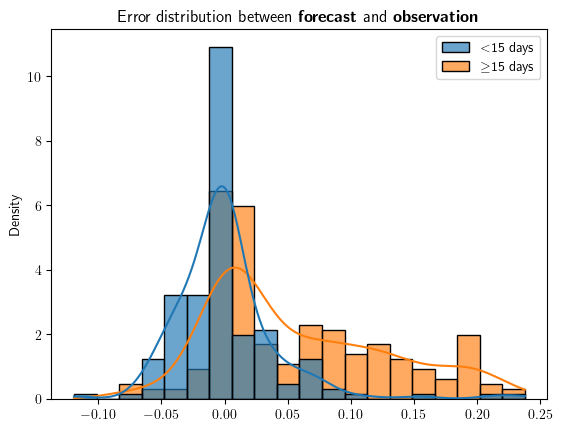

In [15]:
plt.rcParams['text.usetex'] = True

threshold = 15
error_dist = error.mean(dim=["latitude", "longitude", "number"])
sns.histplot(
    x=error_dist,
    stat="density",
    hue=np.where(error_dist["valid_time"].dt.day.values < threshold, rf"$\textless${threshold} days", f"$\ge${threshold} days"),
    multiple="layer",
    kde=True,
    alpha=0.66,
)
plt.title(rf"Error distribution between $\textbf{{forecast}}$ and $\textbf{{observation}}$")

Text(0.5, 1.0, 'Seasonal mean error')

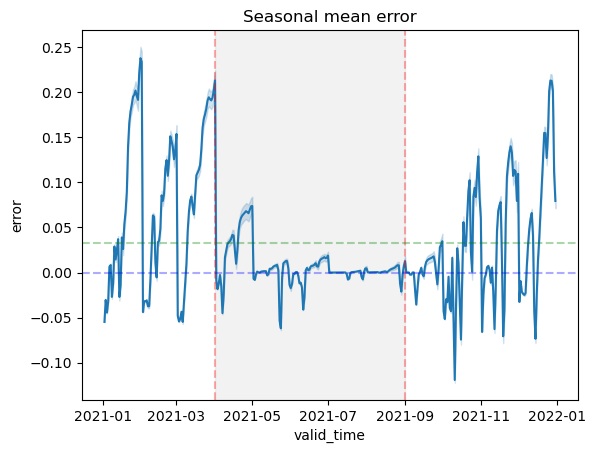

In [8]:
time_mean = error.mean(dim = ["latitude", "longitude"]).to_dataframe(name = "error").reset_index()
sns.lineplot(x = "valid_time", y = "error", data = time_mean, color = sns.color_palette()[0])
plt.axvline(pd.to_datetime("2021-04-01"), color = "red", linestyle = "--", alpha = .33)
plt.axvline(pd.to_datetime("2021-09-01"), color = "red", linestyle = "--", alpha = .33)
plt.axvspan(pd.to_datetime("2021-04-01"), pd.to_datetime("2021-09-01"), color = "gray", alpha = .1)
plt.axhline(0.0, color = "blue", linestyle = "--", alpha = .33)
plt.axhline(bias, color = "green", linestyle = "--", alpha = .33)
plt.title("Seasonal mean error")

Text(0.5, 1.0, 'Average of Seasonal Forecast Error')

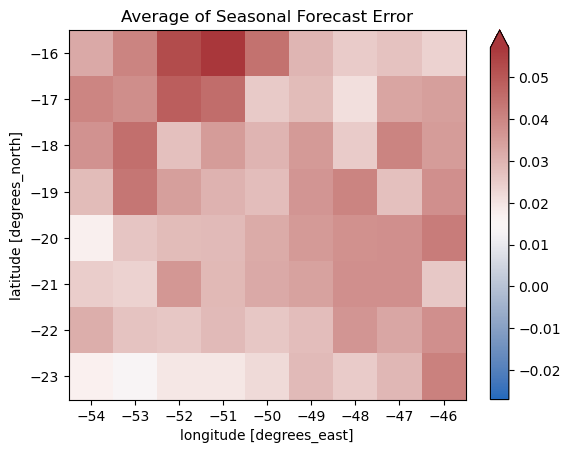

In [13]:
vmin, vmax = (-0.02713115502380263, 0.0571609487587921)  # from forecasts
error.mean(dim=["number", "valid_time"]).plot.pcolormesh(
    x="longitude", y="latitude", cmap="vlag", vmin=vmin, vmax=vmax
)
plt.title("Average of Seasonal Forecast Error")


In [6]:
# error.mean(dim = ["number", "valid_time"]).min().item(), error.mean(dim = ["number", "valid_time"]).max().item()

(0.013475324508904065, 0.05716094875879217)

Text(0.5, 1.0, 'Standard Deviation of Seasonal Forecast Error')

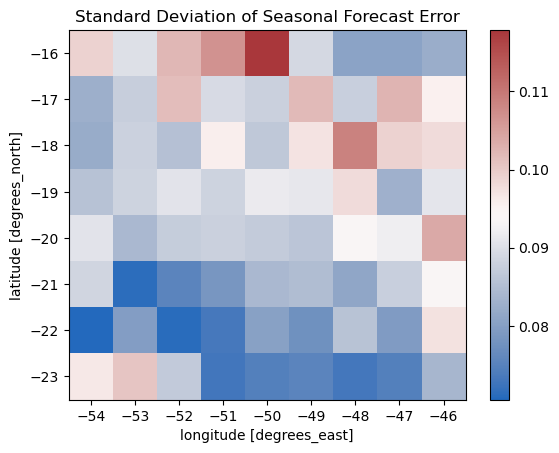

In [14]:
error.std(dim = ["number", "valid_time"]).plot.pcolormesh(x = "longitude", y = "latitude", cmap = "vlag")
plt.title("Standard Deviation of Seasonal Forecast Error")